In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [31]:
df = pd.read_pickle("../../../actionspace_td3/action_space.pkl")
df["model"] = df["model"].apply(lambda x: x.split("/")[-1])
df["opponent"] = df["opponent"].apply(lambda x: x.split("/")[-1])
df["model"].replace("best_old", "ppo", inplace=True)
df["model"].replace("td3_corne", "td3", inplace=True)

In [32]:
df

,action_space,observation_space,reward_space,model,opponent
0,"[[0.9999988079071045, 0.9944448471069336, 1.0,...","[[-2.9628634452819824, 0.04210042953491211, 0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",td3_0_no_self,weak
1,"[[0.9051744937896729, -0.879397988319397, -0.9...","[[-2.9663949012756348, -0.03781485557556152, -...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",td3_0_no_self,strong
2,"[[0.07931435108184814, 0.9991507530212402, -0....","[[-2.9971511363983154, 0.03214597702026367, -0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",td3_0_with_self,weak
3,"[[-0.9982754588127136, -0.30659985542297363, -...","[[-3.0371904373168945, -0.013215065002441406, ...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",td3_0_with_self,strong
4,"[[-0.9999986886978149, 0.9700437784194946, -0....","[[-3.037346363067627, 0.031059741973876953, -0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",td3_2_with_self,weak
5,"[[0.9992852210998535, 0.8863569498062134, 0.99...","[[-2.962888240814209, 0.03803110122680664, 0.0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",td3_2_with_self,strong
6,"[[-0.9997925758361816, 0.9999995231628418, 0.9...","[[-3.0373384952545166, 0.042307376861572266, 0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",td3_2_no_self,weak
7,"[[-0.9989249110221863, 0.9999940395355225, 0.9...","[[-3.037306308746338, 0.04230690002441406, 0.0...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",td3_2_no_self,strong


In [33]:
for opp in df["opponent"].unique():

    df_mean = df[["action_space", "model", "opponent"]].copy()
    df_mean = df_mean[df_mean["opponent"] == opp]

    def convert_helper(action_space):
        action_space = [list(a) for a in action_space]
        action_space = np.array(action_space)
        action_mean = list(action_space.mean(axis=0))
        return action_mean

    df_mean["action_space"] = df_mean["action_space"].apply(convert_helper)
    # make every entry of action space an own column
    #df_mean = pd.DataFrame(df_mean["action_space"].to_list(), index=df_mean.index)
    name1 = "ppo"
    name2 = "td3"
    #df_mean["Model"] = [name1, name2]
    df_mean = df_mean.explode("action_space")
    unique_models = len(df_mean["model"].unique())
    df_mean["theta"] = ["a1", "a2", "a3", "a4"]*int(unique_models)
    # plot more df in one plot
    fig = px.line_polar(df_mean, r='action_space', theta='theta', color="model", line_close=True, title=f"Action Space when opponent is {opp}")

    fig.show()

In [34]:
for opp in df["opponent"].unique():

    df_mean = df[["observation_space", "model", "opponent"]].copy()
    df_mean = df_mean[df_mean["opponent"] == opp]

    def convert_helper(action_space):
        action_space = [list(a) for a in action_space]
        action_space = np.array(action_space)
        action_mean = list(action_space.mean(axis=0))
        return action_mean

    df_mean["observation_space"] = df_mean["observation_space"].apply(convert_helper)
    # make every entry of action space an own column
    #df_mean = pd.DataFrame(df_mean["action_space"].to_list(), index=df_mean.index)

    df_mean = df_mean.explode("observation_space")
    unique_models = len(df_mean["model"].unique())
    df_mean["theta"] = [f"o{i}" for i in range(18)]*int(unique_models)
    # plot more df in one plot
    fig = px.line_polar(df_mean, r='observation_space', theta='theta', color="model", line_close=True, title=f"Observation Space when opponent is {opp}")

    fig.show()




# Location of player

In [257]:
def visualize_location(model, opponent):
    tmp = df[(df["model"]==model) & (df["opponent"]==opponent)]
    obs = tmp["observation_space"].values[0]
    array = np.array(obs)
    array = array[:, :2]
    plt.hist2d(array[:, 0], array[:, 1], bins=20, cmap="Blues")
    # set x and y min and max
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.show()

def visualize_location_comparison(model1, opponent1, model2, opponent2, df):

    tmp = df[(df["model"]==model1) & (df["opponent"]==opponent1)]
    obs1 = tmp["observation_space"].values[0]
    array = np.array(obs1)
    array = array[:, :2]


    tmp2 = df[(df["model"]==model2) & (df["opponent"]==opponent2)]
    obs2 = tmp2["observation_space"].values[0]
    array2 = np.array(obs2).copy()
    array2 = array2[:, :2]

    #transform to other half
    array2[:,0] = array2[:,0]*-1
    ext = (-4, 4, -3, 3)
    plt.figure(figsize=(10, 6))


    hist1 = plt.hexbin(array[:,0], array[:,1], gridsize=10, cmap='Reds', mincnt=0, alpha=0.3, extent=ext)
    hist2 = plt.hexbin(array2[:,0], array2[:,1], gridsize=10, cmap='Blues', mincnt=0, alpha=0.3, extent=ext)
    #plt.colorbar(hist1, orientation='vertical')
    #plt.colorbar(hist2, orientation='vertical')
    hist1.set_label(model1)
    hist2.set_label(model2)
    plt.legend()
    plt.show()
    return array, array2

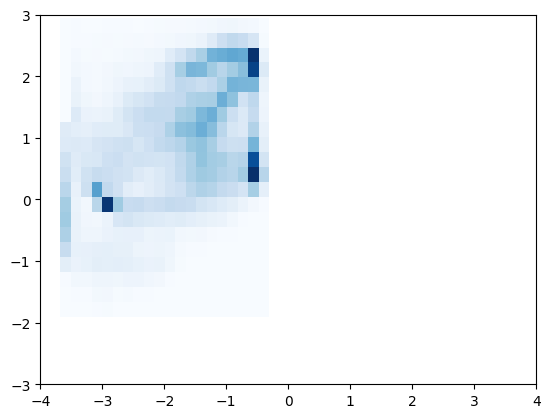

In [258]:
visualize_location("td3_0_no_self", "weak")

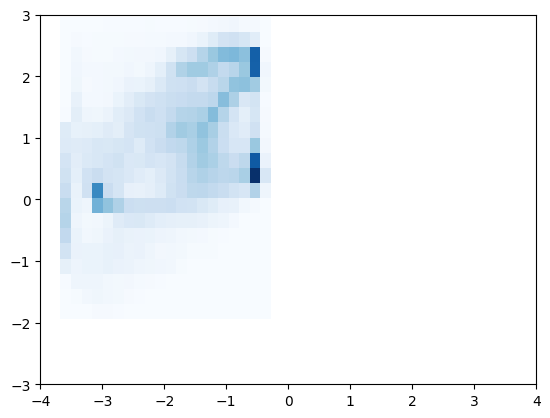

In [259]:
visualize_location("td3_0_no_self", "strong")

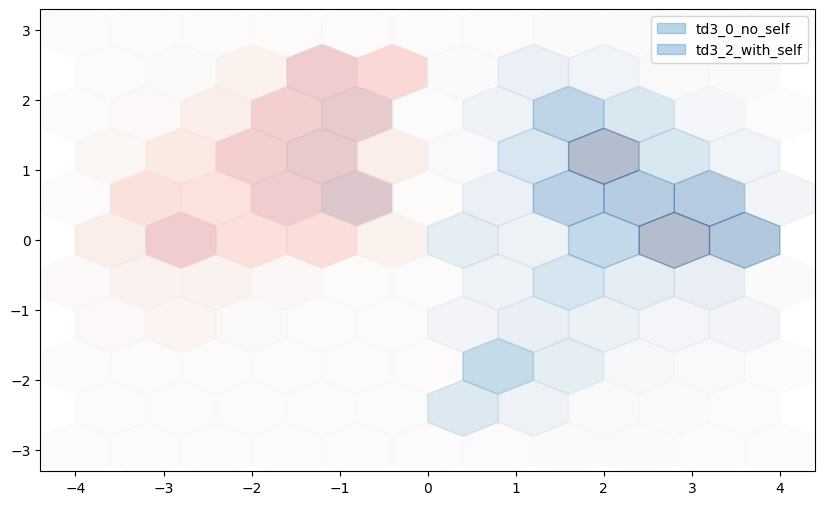

In [260]:
a1, a2 = visualize_location_comparison("td3_0_no_self", "weak", "td3_2_with_self", "weak", df)